#  Superstore_ USA EDA

The **Superstore USA** dataset analysis using Python libraries such as Pandas, Numpy, Matplotlib, and Seaborn.

##  Objective
To analyze sales, profit, customer segments, and regional performance to uncover key business insights that could help decision-making.

---


##Dataset Overview

- Source: Superstore USA
- Contains information on orders including:
  - Order Date, Ship Date
  - Sales, Profit, Quantity
  - Customer and Segment
  - Region, State, and Category

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel("/content/Superstore_USA.xlsx")

In [4]:
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
dataset.shape

(9426, 24)

In [6]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


##Data Cleaning
Reomve the null value from the dataset

In [7]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)

<ipython-input-7-9979c3ec5546>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)


In [8]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [9]:
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1804
Critical,1


In [10]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

##Data Cleaning
fix the order priority vale of the Critical

In [11]:
dataset['Order Priority'].replace('Critical ', 'Critical', inplace=True)

<ipython-input-11-f9544dfc3a7d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Order Priority'].replace('Critical ', 'Critical', inplace=True)


In [12]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


## Count of Order Priority Graph



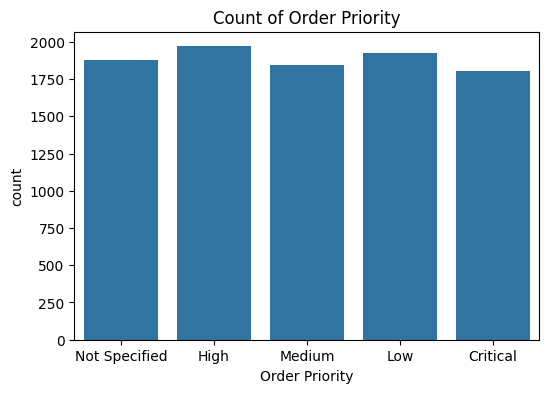

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Order Priority', data = dataset)
plt.title('Count of Order Priority')
plt.savefig('Count of Order Priority .jpg')
plt.show()

In [18]:
dataset['Ship Mode'].value_counts()

,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


In [19]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values
x,y

(Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode'),
 array([7036, 1283, 1107]))

##Percentage wise breakdown of the ship mode

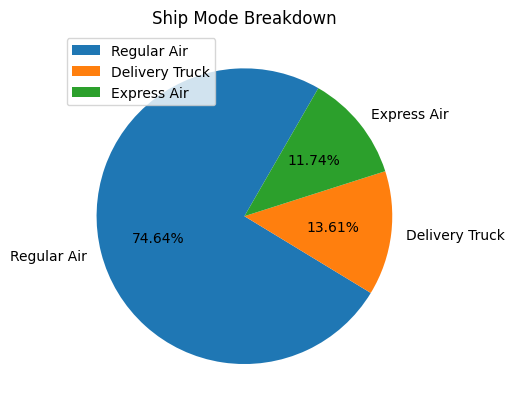

In [35]:
plt.pie(y,labels = x,startangle=60,autopct='%0.2f%%')
plt.title('Ship Mode Breakdown')
plt.legend(loc =2)

##Count of the ship mode category wise with sub category with graph

Text(0.5, 1.0, 'Count of Ship Mode Category Wise')

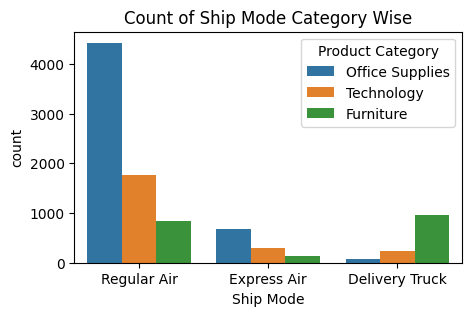

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'Ship Mode', data = dataset,hue='Product Category')
plt.title('Count of Ship Mode Category Wise')
# plt.savefig('Count of Ship Mode .jpg')

##Customer Segment Graph

Text(0.5, 1.0, 'customer sengement')

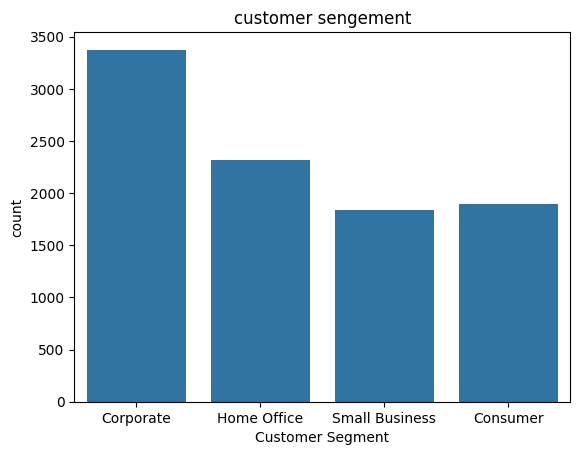

In [22]:
sns.countplot(x = 'Customer Segment', data = dataset)
plt.title('customer sengement')

##Product Category Graph

Text(0.5, 1.0, 'product category count graph')

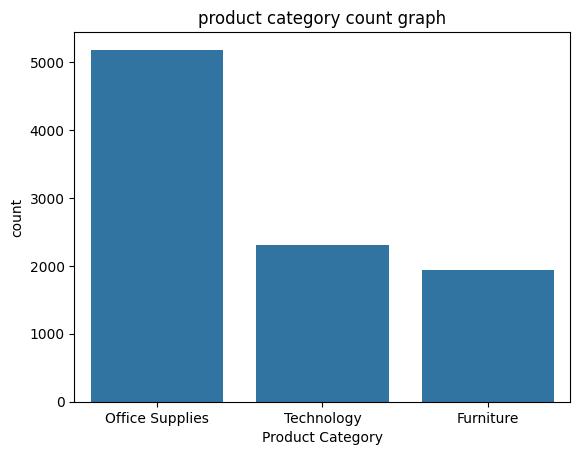

In [23]:
sns.countplot(x = 'Product Category', data = dataset,)
plt.title('product category count graph')

## Graph of the Product Sub Categories within the office supplies

<ipython-input-24-769039ccaf0c>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=1)


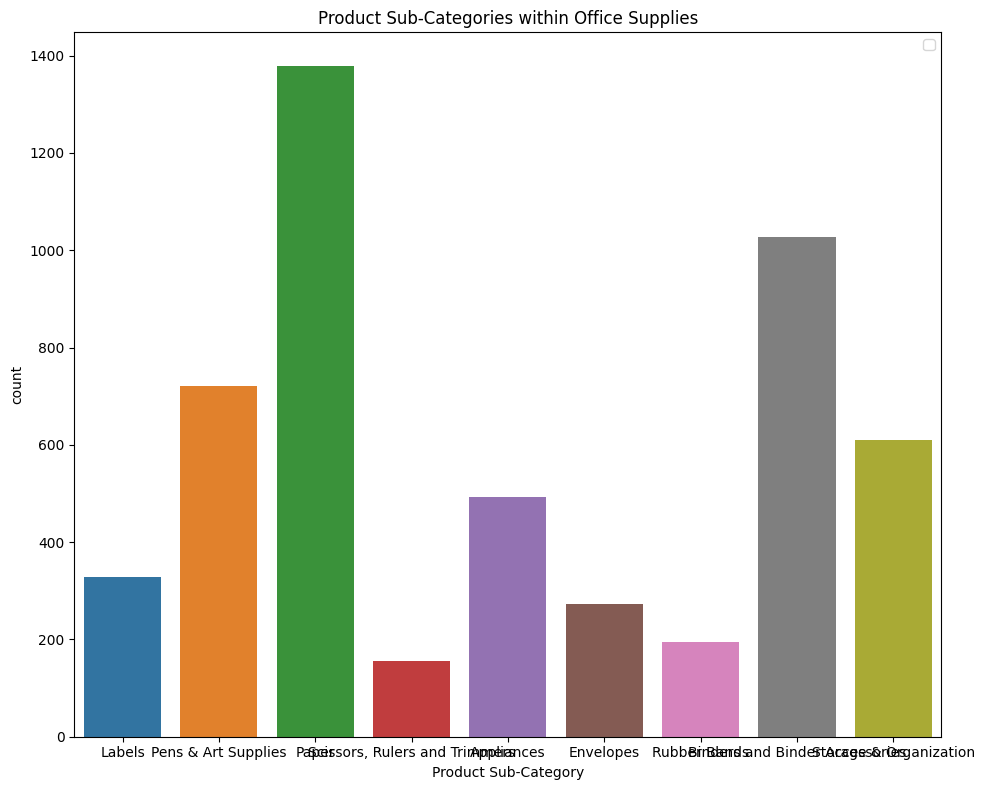

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Product Sub-Category', data = dataset[dataset['Product Category']=='Office Supplies'], hue ='Product Sub-Category', )
plt.title('Product Sub-Categories within Office Supplies')
# plt.xticks()
plt.legend(loc=1)
plt.tight_layout()

### make the the seprate the column of the year

In [25]:
dataset['Order Year']=dataset['Order Date'].dt.year

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [27]:
dataset['Order Year'].value_counts()

,count
Order Year,
2013,3054
2012,2241
2011,2179
2010,1952


## Year Wise Order Count Graph

Text(0.5, 1.0, 'Per Year Order Cont')

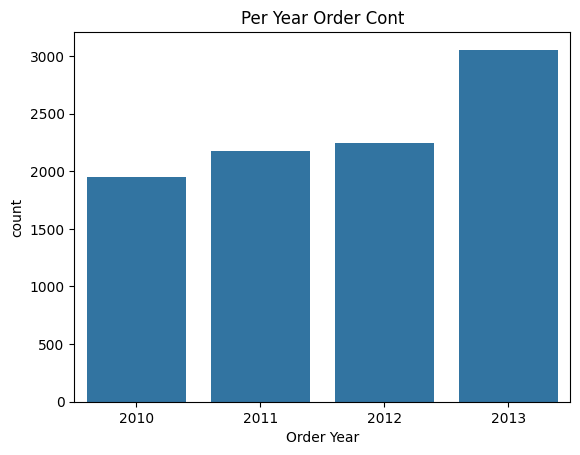

In [28]:
sns.countplot(x = 'Order Year', data = dataset)
plt.title('Per Year Order Cont')

##Barchart  of the category wise profit

Text(0.5, 1.0, 'Category Wise Profit')

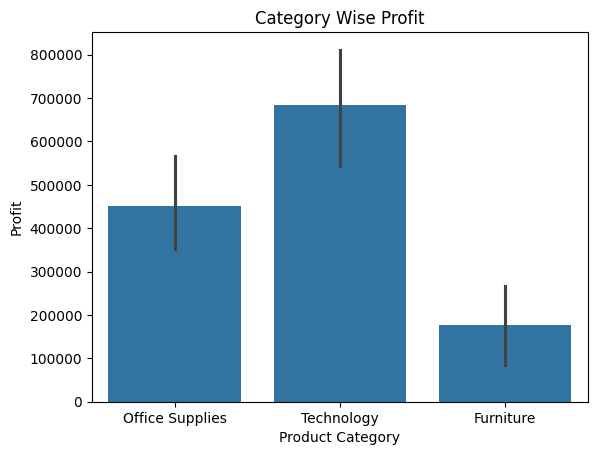

In [29]:
sns.barplot(x='Product Category', y= 'Profit',data = dataset,estimator='sum')
plt.title('Category Wise Profit')

In [30]:
dataset['State or Province'].value_counts()

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522
Ohio,396
Washington,327
Michigan,327
Pennsylvania,271


##Top 5 Top Performing State

In [31]:
dataset['State or Province'].value_counts()[:5]

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522


##Barchart of the Product category vs product base margin

Text(0.5, 1.0, 'Category wise Product Margin')

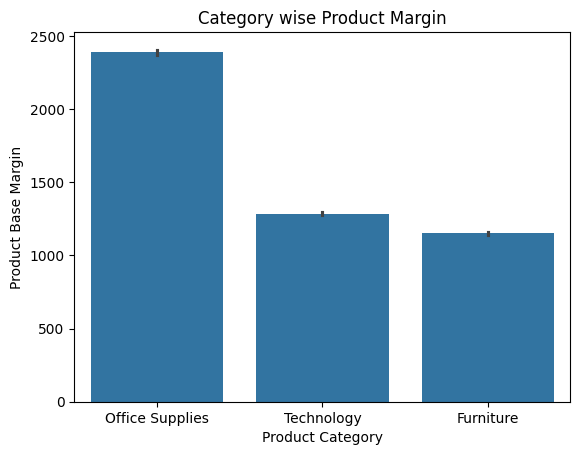

In [32]:
sns.barplot(x='Product Category', y= 'Product Base Margin',data = dataset,estimator='sum')
plt.title('Category wise Product Margin')